In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Healthcare Providers.csv")

In [8]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
5,3443985,1346571551,PUGH,JOHN,R,DPT,M,I,504 ALBEMARLE SQ,NaN,...,97016,Application of blood vessel compression or dec...,N,192,36,192,13.550989583,63.1125,9.6764583333,10.506927083
6,2137027,1215943535,BRUMITT,TOM,B,DO,M,I,70 DOCTORS PARK,NaN,...,20610,Aspiration and/or injection of large joint or ...,N,21,19,21,45.971904762,164.57142857,36.036190476,37.77952381
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50,52,29.33,50,28.74,25.32
8,5086226,1518929124,BOONE,RALPH,M,D.O.,M,I,1215 DUNN AVE,NaN,...,80061,"Blood test, lipids (cholesterol and triglyceri...",N,73,68,73,15.510410959,76,15.197945205,15.197945205
9,3900718,1396781134,METWEST INC,NaN,NaN,NaN,NaN,O,695 S BROADWAY,NaN,...,84392,Urine sulfate (acid) level,N,19,16,19,6.51,29.65,6.38,6.38


In [11]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(100000, 27)

In [13]:
print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-nul

In [15]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   1.000000e+05                  1.000000e+05   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.907646e+06                  1.498227e+09   
std     2.839633e+06                  2.874125e+08   
min     2.090000e+02                  1.003001e+09   
25%     2.458791e+06                  1.245669e+09   
50%     4.901266e+06                  1.497847e+09   
75%     7.349450e+06                  1.740374e+09   
max     9.847440e+06                  1.993000e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                       100000                      95745   
unique                                       42820                      13022   
top                                          PATEL                    M

In [15]:
print("\nMissing values and their percentages:")
missing_values=df.isnull().sum()
missing_percentages=(missing_values/len(df))*100
missing_data=pd.DataFrame({
    'Missing Values':missing_values,
    'Percentage':missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0       0.000
National Provider Identifier                                     0       0.000
Last Name/Organization Name of the Provider                      0       0.000
First Name of the Provider                                    4255       4.255
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
Gender of the Provider                                        4254       4.254
Entity Type of the Provider                                      0       0.000
Street Address 1 of the Provider                                 0       0.000
Street Address 2 of the Provider                             59363      59.363
City of the Provider                                             0       0.000
Zip Code of t

In [17]:
cleaned_df=df.dropna(thresh=len(df)*0.5,axis=1)
print("Shape after removing columns with more than 50% missing values:")
print(cleaned_df.shape)

Shape after removing columns with more than 50% missing values:
(100000, 26)


In [17]:
df = df.dropna(subset=['Gender of the Provider', 'Provider Type'])

In [19]:
# Example: Financial metrics columns might be strings; convert them to numeric
financial_columns = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

In [21]:
for col in financial_columns:
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)

In [23]:
# Count the distribution of provider types
provider_type_counts = df['Provider Type'].value_counts()

In [25]:
print("\nData cleaning completed.")


Data cleaning completed.


In [27]:
# Identify the most and least common provider types
most_common = provider_type_counts.idxmax()
least_common = provider_type_counts.idxmin()
print(f"\nMost Common Provider Type: {most_common} ({provider_type_counts.max()} instances)")
print(f"Least Common Provider Type: {least_common} ({provider_type_counts.min()} instances)")


Most Common Provider Type: Diagnostic Radiology (12537 instances)
Least Common Provider Type: Advanced Heart Failure and Transplant Cardiology (1 instances)


In [29]:
# Gender balance analysis
gender_counts = df['Gender of the Provider'].value_counts()

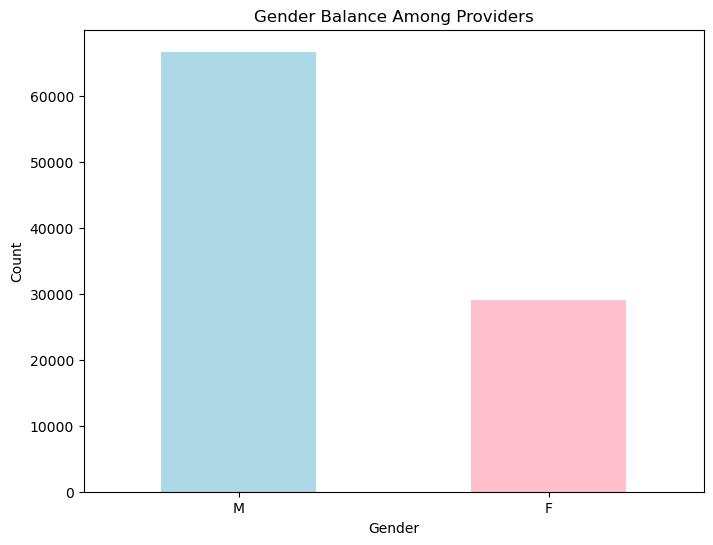

In [31]:
# Plotting the Bar chart for gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Gender Balance Among Providers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
# Count the number of providers in each state
state_counts = df['State Code of the Provider'].value_counts()

In [35]:
# Select the top 10 states with the most providers
top_states = state_counts.head(10)

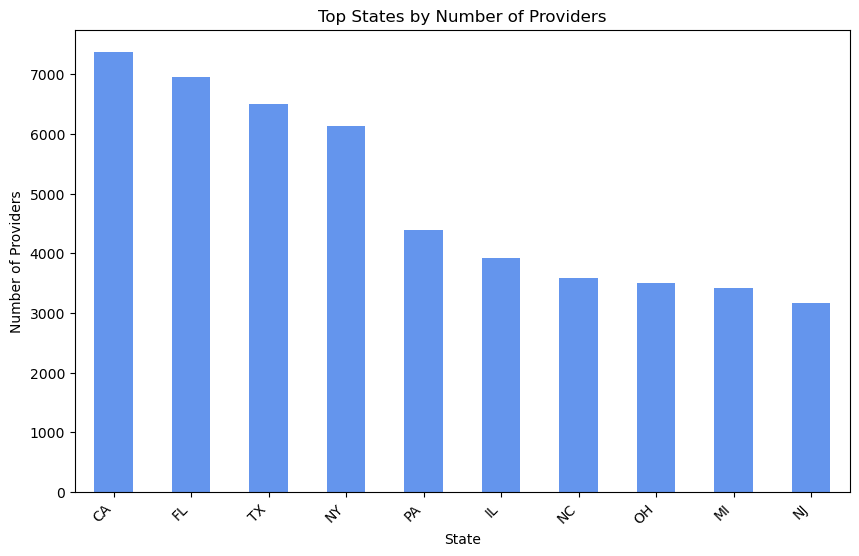

In [37]:
# 2.)Plotting the Bar chart for top states by number of providers
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='cornflowerblue')
plt.title('Top States by Number of Providers')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
# Display the top states and their provider counts
print("\nTop States by Number of Providers:")
print(top_states)


Top States by Number of Providers:
State Code of the Provider
CA    7377
FL    6953
TX    6496
NY    6131
PA    4393
IL    3916
NC    3583
OH    3494
MI    3411
NJ    3171
Name: count, dtype: int64


In [41]:
city_counts = df['City of the Provider'].value_counts()

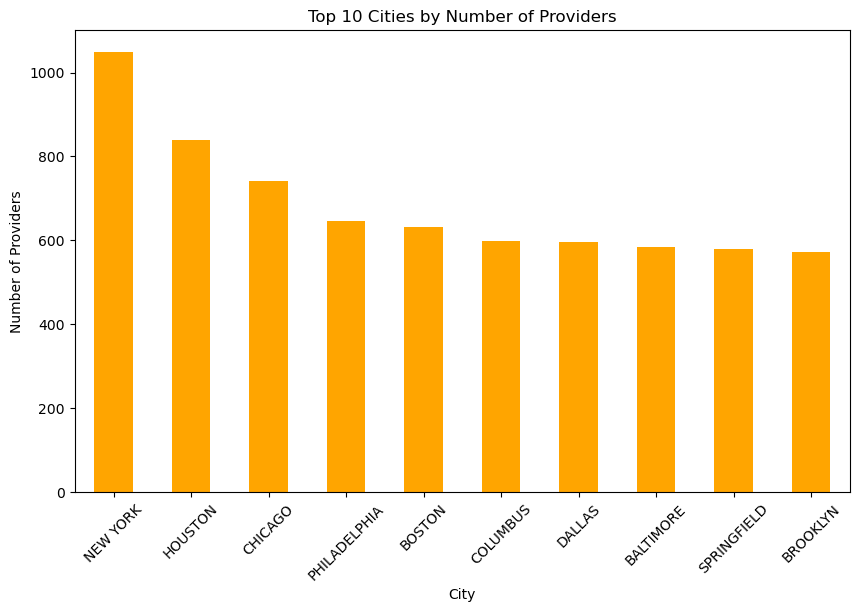

In [43]:
# 3.)Plotting a bar chart for cities with the most active healthcare providers
top_cities = city_counts.head(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Number of Providers')
plt.xlabel('City')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Preparing a pivot table for heatmap
state_city_counts = df.groupby(['State Code of the Provider', 'City of the Provider']).size().unstack(fill_value=0)

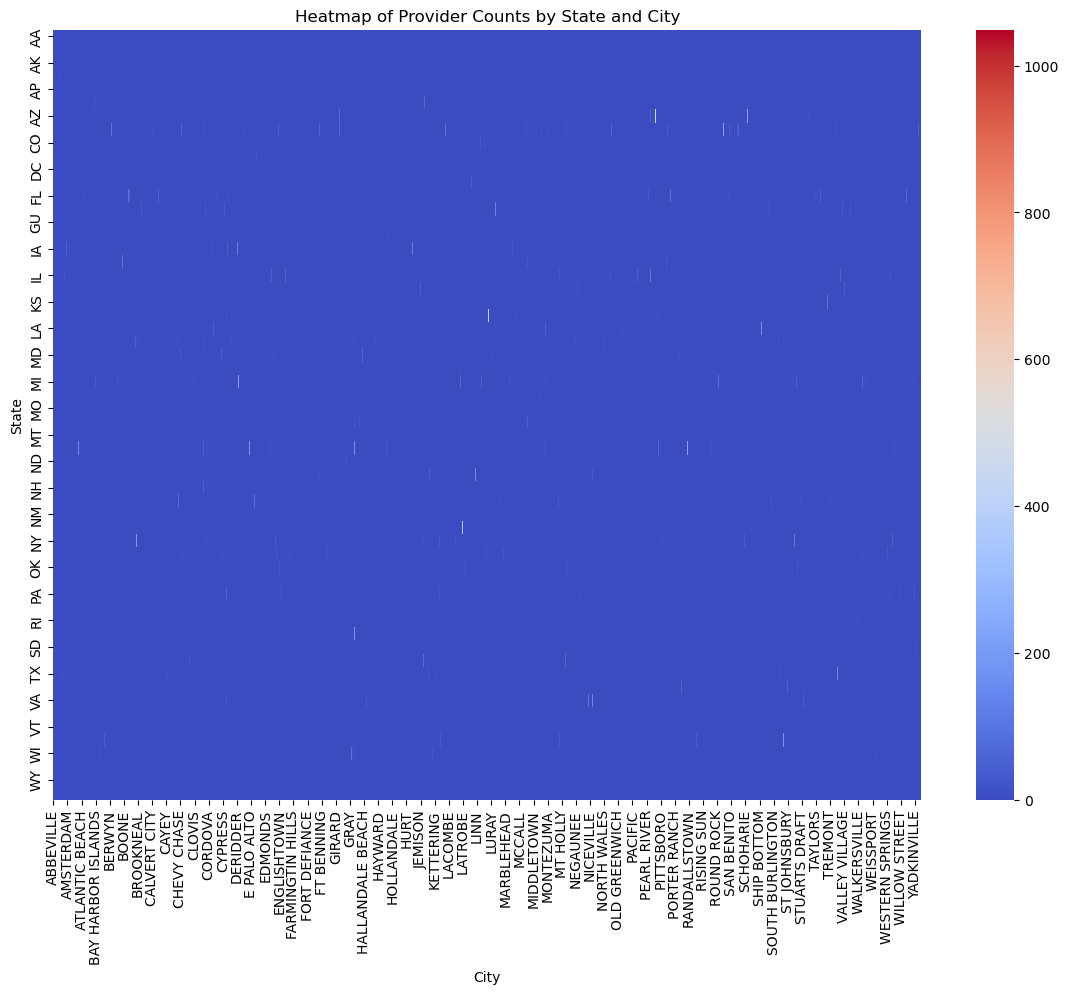

In [47]:
# Heatmap visualization
plt.figure(figsize=(14, 10))
sns.heatmap(state_city_counts, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Provider Counts by State and City')
plt.xlabel('City')
plt.ylabel('State')
plt.show()

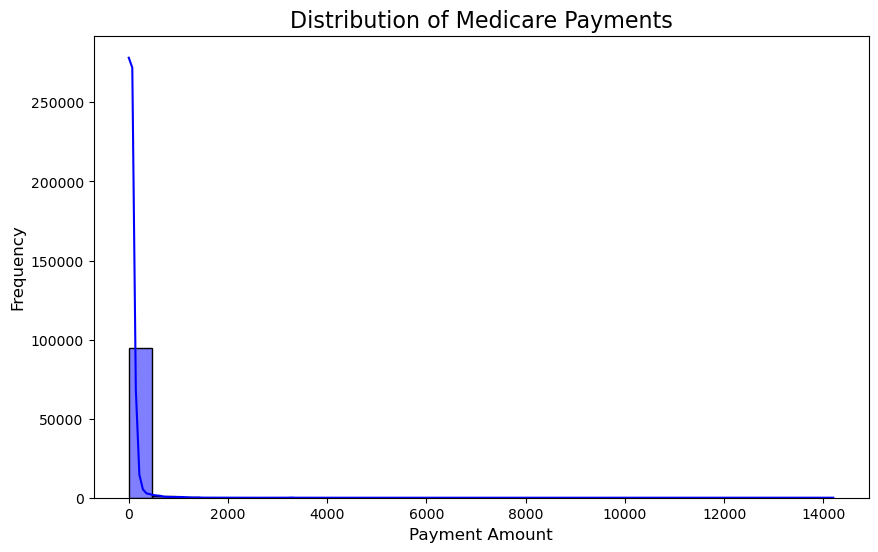

In [49]:
# Plotting bar char of Medicare Payments with a different color
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Medicare Payment Amount'], bins=30, kde=True, color='Blue')
plt.title('Distribution of Medicare Payments', fontsize=16)
plt.xlabel('Payment Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [51]:
# Generate summary statistics for these column
summary_stats = df[financial_columns].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Average Medicare Allowed Amount  Average Submitted Charge Amount  \
count                     95746.000000                     95746.000000   
mean                         97.332488                       333.666271   
std                         214.892260                       892.704787   
min                           0.010000                         0.010000   
25%                          25.069670                        60.000000   
50%                          66.640000                       150.000000   
75%                         112.941154                       299.000000   
max                       18112.740000                     47000.000000   

       Average Medicare Payment Amount  Average Medicare Standardized Amount  
count                     95746.000000                          95746.000000  
mean                         73.870292                             74.465022  
std                         166.784479                            

In [53]:
# Convert relevant columns to numeric
numeric_columns = [
    "Number of Services",
    "Average Medicare Payment Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Allowed Amount",
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [55]:
# Drop rows with missing numeric data
df_cleaned = df.dropna(subset=numeric_columns)

In [57]:
# Calculate IQR for detecting outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [59]:
# Detect outliers for services and payments
service_outliers = detect_outliers_iqr(df_cleaned, "Number of Services")
payment_outliers = detect_outliers_iqr(df_cleaned, "Average Medicare Payment Amount")

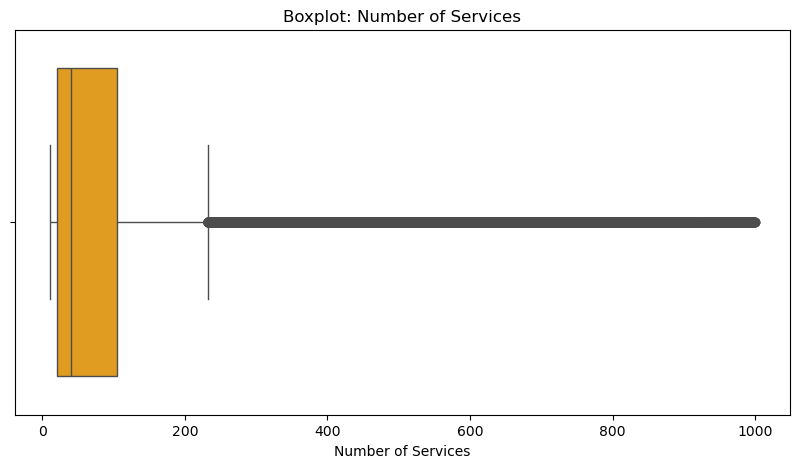

In [61]:
# Visualizations
# Boxplot for Number of Services
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["Number of Services"], color='orange')
plt.title("Boxplot: Number of Services")
plt.xlabel("Number of Services")
plt.show()

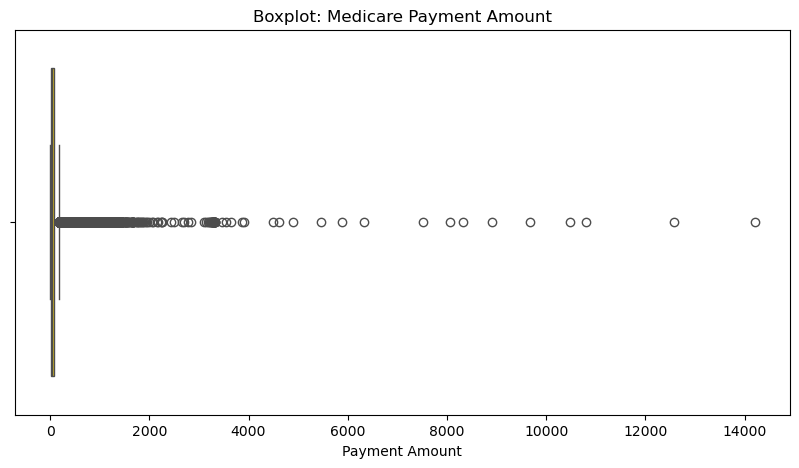

In [63]:
# Boxplot for Medicare Payment Amounts
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["Average Medicare Payment Amount"], color='gold')
plt.title("Boxplot: Medicare Payment Amount")
plt.xlabel("Payment Amount")
plt.show()

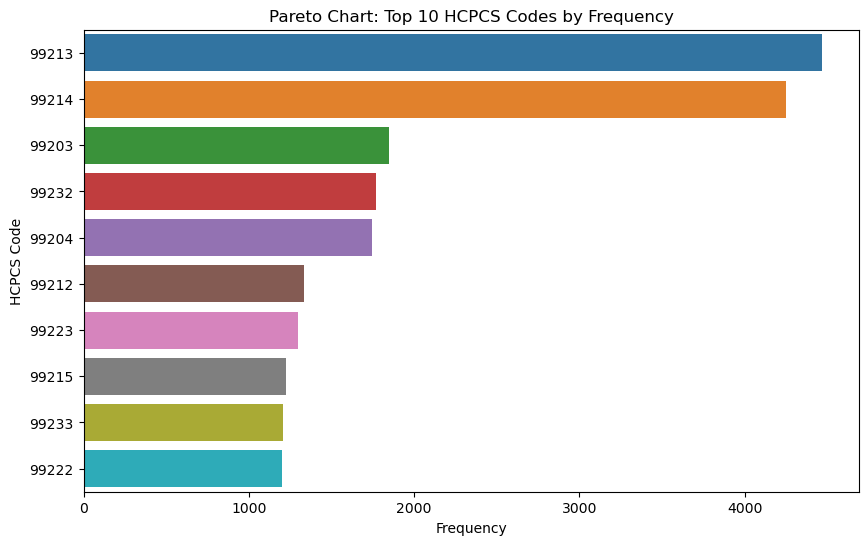

In [65]:
# Pareto chart for top HCPCS codes
hcpcs_counts = df_cleaned["HCPCS Code"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=hcpcs_counts.values, y=hcpcs_counts.index, hue=hcpcs_counts.index, dodge=False, legend=False)
plt.title("Pareto Chart: Top 10 HCPCS Codes by Frequency")
plt.xlabel("Frequency")
plt.ylabel("HCPCS Code")
plt.show()

In [67]:
# Print summary of detected outliers
print("Service Outliers Summary:")
print(service_outliers[["HCPCS Code", "Number of Services"]].head())

print("\nPayment Outliers Summary:")
print(payment_outliers[["HCPCS Code", "Average Medicare Payment Amount"]].head())

Service Outliers Summary:
   HCPCS Code  Number of Services
16      99213               364.0
22      43239               272.0
30      99309               552.0
61      11042               545.0
78      J1030               335.0

Payment Outliers Summary:
    HCPCS Code  Average Medicare Payment Amount
13       99291                       192.630377
26       90670                       183.587917
72       95811                       517.969286
87       99291                       235.656087
122      27130                      1522.478065


In [69]:
# Convert relevant columns to numeric
numeric_columns = [
    "Number of Services",
    "Average Medicare Payment Amount",
    "Number of Medicare Beneficiaries",
    "Average Submitted Charge Amount",
    "Average Medicare Allowed Amount",
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [71]:
# Drop rows with missing numeric data
df_cleaned = df.dropna(subset=numeric_columns)

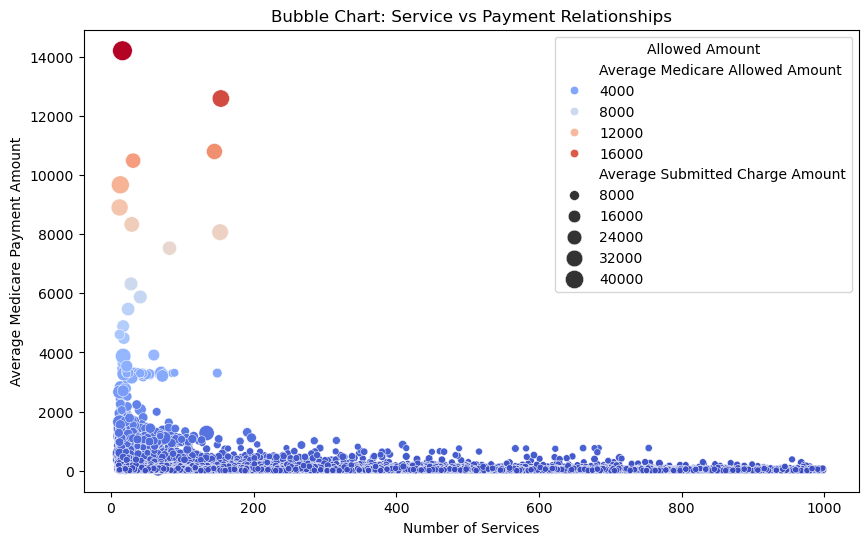

In [73]:
# Analyze relationship between service counts and financial metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x="Number of Services",
    y="Average Medicare Payment Amount",
    size="Average Submitted Charge Amount",
    hue="Average Medicare Allowed Amount",
    sizes=(20, 200),
    palette="coolwarm",
)
plt.title("Bubble Chart: Service vs Payment Relationships")
plt.xlabel("Number of Services")
plt.ylabel("Average Medicare Payment Amount")
plt.legend(title="Allowed Amount")
plt.show()

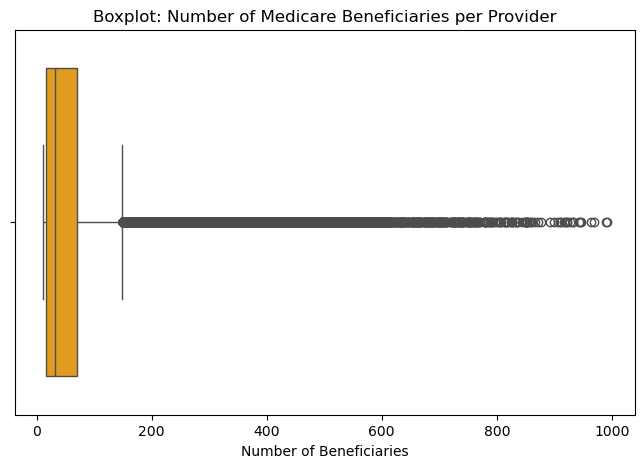

In [80]:
# Beneficiary Analysis: Spotting providers with unusually high/low beneficiaries
if "Number of Medicare Beneficiaries" in df_cleaned.columns:
    # Boxplot to visualize the range of beneficiaries
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned["Number of Medicare Beneficiaries"], color="orange")
    plt.title("Boxplot: Number of Medicare Beneficiaries per Provider")
    plt.xlabel("Number of Beneficiaries")
    plt.show()

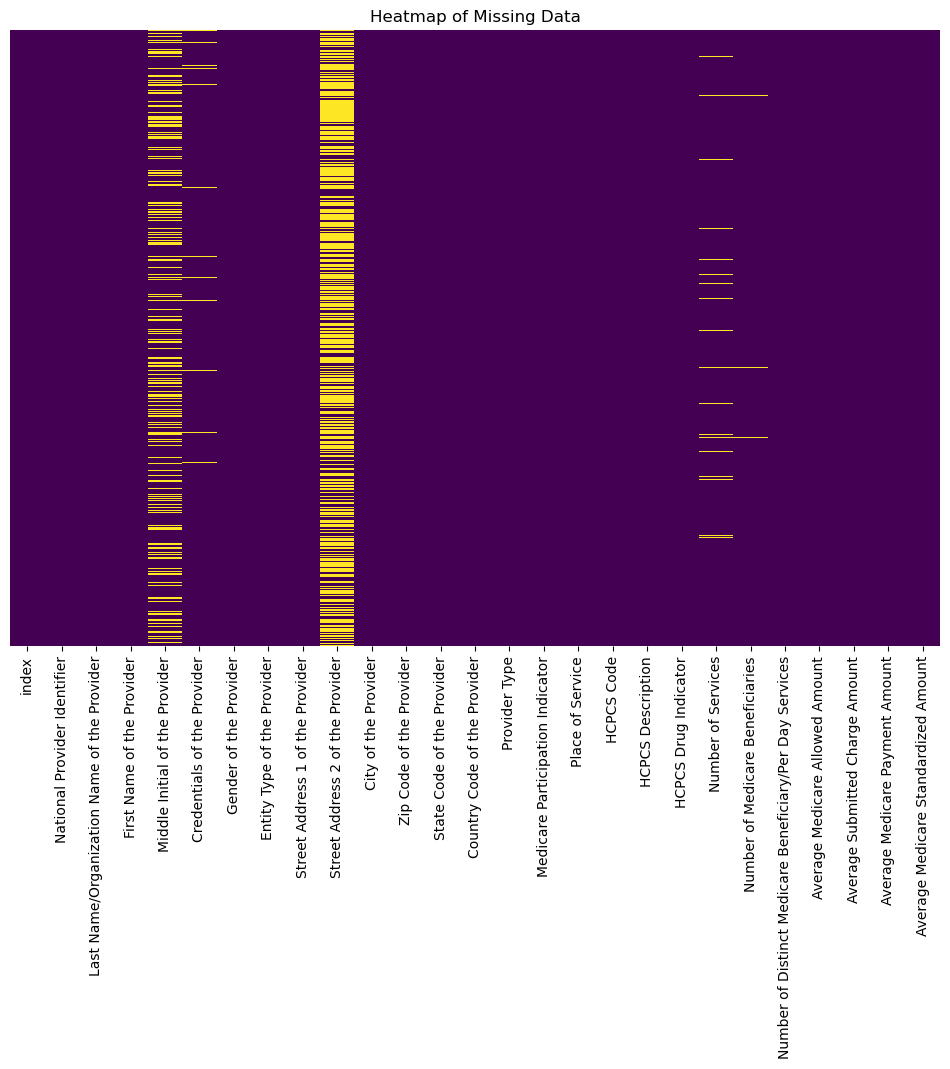

In [75]:
# Visualize missing data patterns
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()

In [87]:
#Duplication and Consistency Checks
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [79]:
# Check for duplicate rows based on relevant columns
duplicates = df[df.duplicated(subset=["City of the Provider", "First Name of the Provider"], keep=False)]
print("Duplicate Rows Found:")
print(duplicates.head())

Duplicate Rows Found:
      index  National Provider Identifier  \
1   3354385                    1346202256   
5   3443985                    1346571551   
11  7138229                    1720086507   
16  3642669                    1366846719   
19  8381319                    1851322572   

   Last Name/Organization Name of the Provider First Name of the Provider  \
1                                        JONES                      WENDY   
5                                         PUGH                       JOHN   
11                                   RODRIGUEZ                       ERIC   
16                                      ORREGO                      MARIA   
19                                     SHAPIRO                     EDWARD   

   Middle Initial of the Provider Credentials of the Provider  \
1                               P                        M.D.   
5                               R                         DPT   
11                              J                

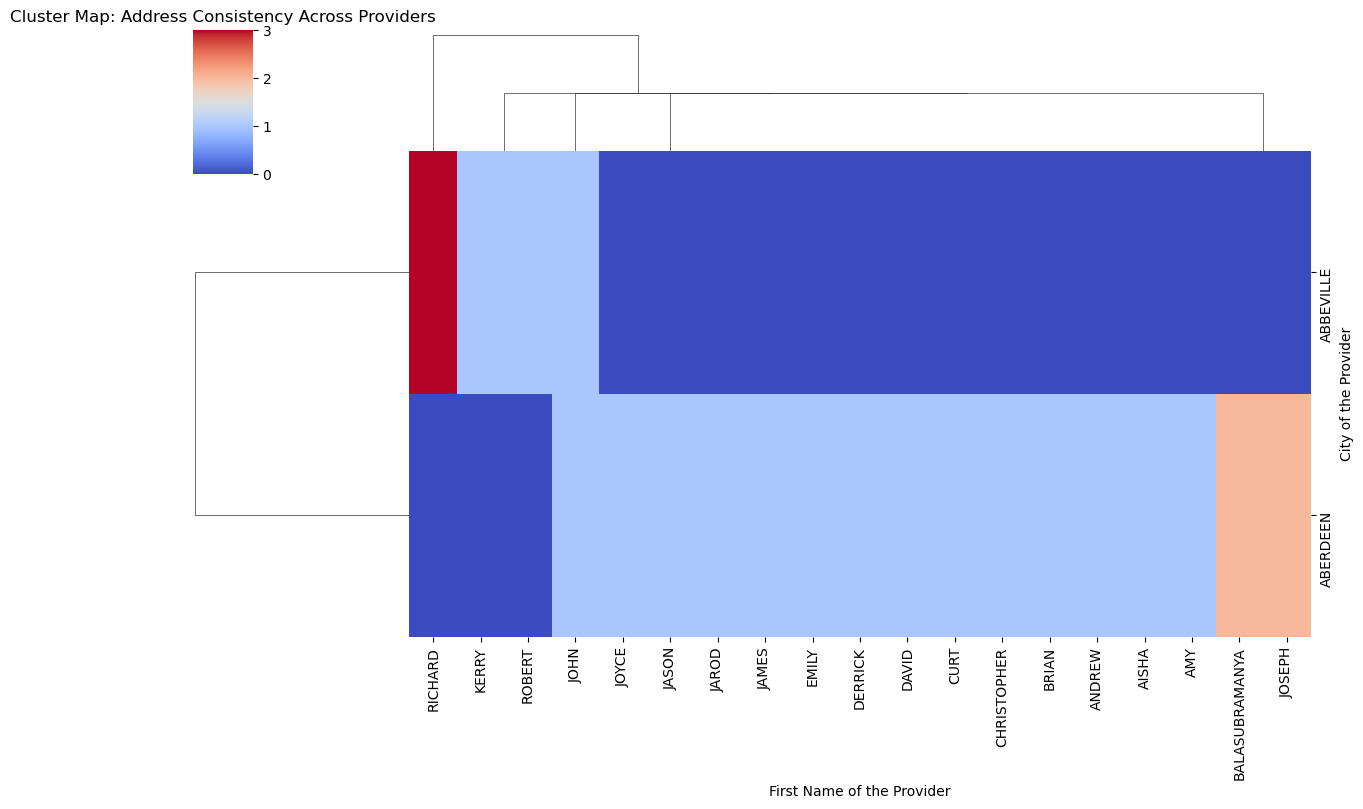

In [88]:
# Subset the data to top 20 addresses and 20 providers for better performance
address_consistency_subset = address_consistency.head(20).pivot(index="City of the Provider", columns="First Name of the Provider", values="count").fillna(0)

# Cluster map with subset
sns.clustermap(address_consistency_subset, cmap="coolwarm", figsize=(12, 8), method='single')
plt.title("Cluster Map: Address Consistency Across Providers")
plt.show()

In [90]:
stats_summary = address_consistency_subset.describe()
print("Descriptive Statistics for Address Consistency Data:")
print(stats_summary)

Descriptive Statistics for Address Consistency Data:
First Name of the Provider     AISHA       AMY    ANDREW  BALASUBRAMANYA  \
count                       2.000000  2.000000  2.000000        2.000000   
mean                        0.500000  0.500000  0.500000        1.000000   
std                         0.707107  0.707107  0.707107        1.414214   
min                         0.000000  0.000000  0.000000        0.000000   
25%                         0.250000  0.250000  0.250000        0.500000   
50%                         0.500000  0.500000  0.500000        1.000000   
75%                         0.750000  0.750000  0.750000        1.500000   
max                         1.000000  1.000000  1.000000        2.000000   

First Name of the Provider     BRIAN  CHRISTOPHER      CURT     DAVID  \
count                       2.000000     2.000000  2.000000  2.000000   
mean                        0.500000     0.500000  0.500000  0.500000   
std                         0.707107     0.